# FaST-LMM Epistasis returning Beta and Variance_Beta

FaST-LMM Team, May 1, 2021

### Introduction

FaST-LMM, which stands for Factored Spectrally Transformed Linear Mixed Models, is a program for performing 
genome-wide association studies (GWAS) on datasets of all sizes, up to one millions samples.

See [FaST-LMM's README.md](https://github.com/fastlmm/FaST-LMM/blob/master/README.md) for installation instructions, documentation, code, and a bibliography.

### Contacts

* Email the developers at fastlmm-dev@python.org.
* [Join](mailto:fastlmm-user-join@python.org?subject=Subscribe) the user discussion and announcement list (or use [web sign up](https://mail.python.org/mailman3/lists/fastlmm-user.python.org)).
* [Open an issue](https://github.com/fastlmm/FaST-LMM/issues) on GitHub.

### Citing FaST-LMM

If you use FaST-LMM in any published work, please cite [the relevant manuscript(s)](https://github.com/fastlmm/FaST-LMM/blob/master/README.md) describing it. 

### Data preparation

This version of FaST-LMM is designed for use with randomly ascertained data with Gaussian residuals.  If you have case-control data with substantial ascertainment bias, you should first transform your phenotype(s) using [LEAP](https://github.com/omerwe/LEAP) (Weissbrod _et al._, _arXiv_ 2014).  If you are analyzing continuous phenotypes with non-Gaussian residuals, you should first transform your phenotype(s) using [Warped-LMM](https://github.com/PMBio/warpedLMM) (Fusi et al., _Nature Commun_ 2014).

FaST-LMM uses four input files containing (1) the SNP data to be tested, (2) the SNP data used to determine the genetic similarity matrix (GSM) between individuals (which can be different from 1), (3) the phenotype data, and (4, optionally) a set of covariates.

SNP files can be in PLINK format (ped/map, tped/tfam, bed/bim/fam, or fam/dat/map).  For the most speed, use the binary format in SNP major order.  See the PLINK manual http://pngu.mgh.harvard.edu/~purcell/plink/ (Purcell et al., _Am J Hum Genet_ 2007) for further details.  FaST-LMM also supports Hdf5 file format http://www.hdfgroup.org/HDF5/whatishdf5.html.  See https://github.com/fastlmm/PySnpTools for more details.  Note that each SNP will be standardized to have mean zero and standard deviation one across all individuals before processing.  Missing values are mean imputed.

The required file containing the phenotype uses the PLINK alternate phenotype format with no header.  The covariate file also uses this format (with additional columns for multiple covariates).


### Notebook preparation and general use

To prepare this notebook to run analyses, please run the following script.

In [1]:
# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.WARNING)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
#pylab.plot([1,2,3],[4,5,6])

# set display width for pandas data frames
import pandas as pd
pd.set_option('display.width', 1000)

If you would like to run any of the code below from the command line, first copy it into a file (_e.g._, `test.py`), and then run it by typing `python text.py` at the command line.

If you would like to see all the options for a function just type `? <function_name>` to an ipython prompt.

### Epistasis

You can test for epistatic interactions between pairs of SNPs as well.  Here is an example analysis applied to the same synthetic data. This code optimizes h2 using REML. For likelihood (and beta), it uses ML.

m:\deldir\fastlmmD\doc\ipynb
lambda=0.9234


,SNP0,Chr0,GenDist0,ChrPos0,SNP1,Chr1,GenDist1,ChrPos1,PValue,NullLogLike,AltLogLike,H2,Beta,Variance_Beta
0,snp2376_m0_.38m1_.49,1.0,20.0,20.0,snp1754_m0_.19m1_.42,1.0,38.0,38.0,0.000451,-700.878718,-694.724583,0.000399,0.151714,7.372408e-07
1,snp625_m0_.03m1_.07,1.0,NaN,NaN,snp3000_m0_.28m1_.34,1.0,5.0,5.0,0.001306,-700.387891,-695.220652,0.000399,-0.117448,5.272537e-07
2,snp250_m0_.23m1_.19,1.0,15.0,15.0,snp2377_m0_.06m1_.02,1.0,30.0,30.0,0.002279,-698.768488,-694.113511,0.000399,-0.145412,8.980881e-07
3,snp625_m0_.03m1_.07,1.0,NaN,NaN,snp376_m0_.17m1_.17,1.0,9.0,9.0,0.002287,-700.206861,-695.555229,0.000399,-0.132940,7.511802e-07
4,snp125_m0_.64m1_.41,1.0,21.0,21.0,snp1754_m0_.19m1_.42,1.0,38.0,38.0,0.002404,-700.873861,-696.267594,0.000399,-0.131984,7.477779e-07
5,snp2878_m0_.82m1_.58,1.0,42.0,42.0,snp1878_m0_.58m1_.36,1.0,48.0,48.0,0.002568,-698.579519,-694.033792,0.000399,-0.131828,7.560385e-07
6,snp1625_m0_.4m1_.47,1.0,23.0,23.0,snp1128_m0_.14m1_.13,1.0,35.0,35.0,0.003067,-700.445456,-696.061998,0.000399,0.129267,7.540972e-07
7,snp1753_m0_.17m1_.19,1.0,28.0,28.0,snp3_m0_.55m1_.46,1.0,32.0,32.0,0.004327,-700.735073,-696.664365,0.000399,0.126579,7.791090e-07
8,snp250_m0_.23m1_.19,1.0,15.0,15.0,snp3_m0_.55m1_.46,1.0,32.0,32.0,0.004486,-700.927439,-696.889564,0.000399,-0.120030,7.063126e-07
9,snp1753_m0_.17m1_.19,1.0,28.0,28.0,snp251_m0_.1m1_.49,1.0,33.0,33.0,0.006503,-700.728933,-697.026244,0.000399,-0.115623,7.152112e-07


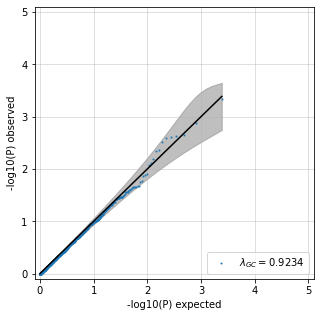

In [2]:
# import the algorithm and reader
import numpy as np
from fastlmm.association import epistasis
from pysnptools.snpreader import Bed
from fastlmm.util import example_file # Download and return local file name

# define file names
bed_fn = example_file('tests/datasets/synth/all.*','*.bed')
bed_reader = Bed(bed_fn, count_A1=True)
pheno_fn = example_file("tests/datasets/synth/pheno_10_causals.txt")
cov_fn = example_file("tests/datasets/synth/cov.txt")

# partition data into the first 50 SNPs on chr1 and all but chr1
G0 = bed_reader[:,bed_reader.pos[:,0] != 1]
test_snps = bed_reader[:,bed_reader.pos[:,0] == 1][:,0:50]

# run epistasis analysis
results_df = epistasis(test_snps, pheno_fn, G0=G0, covar=cov_fn)

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
pd.set_option('display.width', 1000)
results_df.head(n=10)

In [115]:
epistasis(test_snps[::-1,:], pheno_fn, G0=G0, covar=cov_fn)

,SNP0,Chr0,GenDist0,ChrPos0,SNP1,Chr1,GenDist1,ChrPos1,PValue,NullLogLike,AltLogLike,H2,Beta,Variance_Beta
0,snp2376_m0_.38m1_.49,1.0,20.0,20.0,snp1754_m0_.19m1_.42,1.0,38.0,38.0,0.000451,-700.878718,-694.724583,0.000399,0.151714,7.372408e-07
1,snp625_m0_.03m1_.07,1.0,NaN,NaN,snp3000_m0_.28m1_.34,1.0,5.0,5.0,0.001306,-700.387891,-695.220652,0.000399,-0.117448,5.272537e-07
2,snp250_m0_.23m1_.19,1.0,15.0,15.0,snp2377_m0_.06m1_.02,1.0,30.0,30.0,0.002279,-698.768488,-694.113511,0.000399,-0.145412,8.980881e-07
3,snp625_m0_.03m1_.07,1.0,NaN,NaN,snp376_m0_.17m1_.17,1.0,9.0,9.0,0.002287,-700.206861,-695.555229,0.000399,-0.132940,7.511802e-07
4,snp125_m0_.64m1_.41,1.0,21.0,21.0,snp1754_m0_.19m1_.42,1.0,38.0,38.0,0.002404,-700.873861,-696.267594,0.000399,-0.131984,7.477779e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,snp1375_m0_.03m1_.03,1.0,10.0,10.0,snp4750_m0_.01m1_.01,1.0,49.0,49.0,1.000000,-700.835947,-700.835947,0.000399,-0.000304,3.764406e-08
1221,snp1375_m0_.03m1_.03,1.0,10.0,10.0,snp2377_m0_.06m1_.02,1.0,30.0,30.0,1.000000,-698.732656,-698.732656,0.000399,0.010731,7.061152e-08
1222,snp3001_m0_.02m1_,1.0,14.0,14.0,snp4750_m0_.01m1_.01,1.0,49.0,49.0,1.000000,-700.915986,-700.915986,0.000399,0.001738,3.637141e-08
1223,snp376_m0_.17m1_.17,1.0,9.0,9.0,snp626_m0_.01m1_,1.0,13.0,13.0,1.000000,-700.202435,-700.202435,0.000399,-0.019969,1.639906e-07


Now, let's look at the same example where the eigenvalue decomposition of kernel is known.

We can provide the eigenvalues and eigenvector by writing a npz file and passing it to 'epistatis'

In [8]:
from pathlib import Path
from pysnptools.snpreader import SnpData
from pysnptools.util import intersect_apply

# Let S,U
G = G0[::-1,:] # We change the order of the individuals, just to show that it is allowed.
Gval = G.read().standardize().val
K = Gval.dot(Gval.T)
# So the Eigen values and vector are:
S,U = np.linalg.eigh(K)
# and the order individuals in the eigenvector is
eigen_iid = G.iid
print(f"{eigen_iid[:3]}...")

# We write the vector and the values to a npz file.
cache_file = "cache/us.npz"
Path(cache_file).parent.mkdir(exist_ok=True)
# note that U goes before S
np.savez(cache_file,U,S)
# We create a stub for G, the SNPs that created the kinship matrix to which we applied 'eigh'
stub_g0 = SnpData(iid=eigen_iid,sid=["stub_sid"],val=np.full((test_snps.iid_count,1),np.nan))

# Reorder test_snps to match the order in the eigenvector
stub_g0_after, test_snps_reordered = intersect_apply([stub_g0, test_snps])
assert np.all(stub_g0_after.iid == stub_g0.iid) # prove that we didn't re-order these
print(f"{test_snps_reordered.iid[:3]}...")

df = epistasis(test_snps_reordered, pheno_fn, G0=stub_g0, covar=cov_fn, cache_file=cache_file)
df

[['cid499P1' 'cid499P1']
 ['cid498P1' 'cid498P1']
 ['cid497P1' 'cid497P1']]...
[['cid499P1' 'cid499P1']
 ['cid498P1' 'cid498P1']
 ['cid497P1' 'cid497P1']]...


,SNP0,Chr0,GenDist0,ChrPos0,SNP1,Chr1,GenDist1,ChrPos1,PValue,NullLogLike,AltLogLike,H2,Beta,Variance_Beta
0,snp2376_m0_.38m1_.49,1.0,20.0,20.0,snp1754_m0_.19m1_.42,1.0,38.0,38.0,0.000451,-700.878718,-694.724583,0.000399,0.151714,7.372408e-07
1,snp625_m0_.03m1_.07,1.0,NaN,NaN,snp3000_m0_.28m1_.34,1.0,5.0,5.0,0.001306,-700.387891,-695.220652,0.000399,-0.117448,5.272537e-07
2,snp250_m0_.23m1_.19,1.0,15.0,15.0,snp2377_m0_.06m1_.02,1.0,30.0,30.0,0.002279,-698.768488,-694.113511,0.000399,-0.145412,8.980881e-07
3,snp625_m0_.03m1_.07,1.0,NaN,NaN,snp376_m0_.17m1_.17,1.0,9.0,9.0,0.002287,-700.206861,-695.555229,0.000399,-0.132940,7.511802e-07
4,snp125_m0_.64m1_.41,1.0,21.0,21.0,snp1754_m0_.19m1_.42,1.0,38.0,38.0,0.002404,-700.873861,-696.267594,0.000399,-0.131984,7.477779e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,snp1375_m0_.03m1_.03,1.0,10.0,10.0,snp4750_m0_.01m1_.01,1.0,49.0,49.0,1.000000,-700.835947,-700.835947,0.000399,-0.000304,3.764406e-08
1221,snp1375_m0_.03m1_.03,1.0,10.0,10.0,snp2377_m0_.06m1_.02,1.0,30.0,30.0,1.000000,-698.732656,-698.732656,0.000399,0.010731,7.061152e-08
1222,snp3001_m0_.02m1_,1.0,14.0,14.0,snp4750_m0_.01m1_.01,1.0,49.0,49.0,1.000000,-700.915986,-700.915986,0.000399,0.001738,3.637141e-08
1223,snp376_m0_.17m1_.17,1.0,9.0,9.0,snp626_m0_.01m1_,1.0,13.0,13.0,1.000000,-700.202435,-700.202435,0.000399,-0.019969,1.639906e-07
